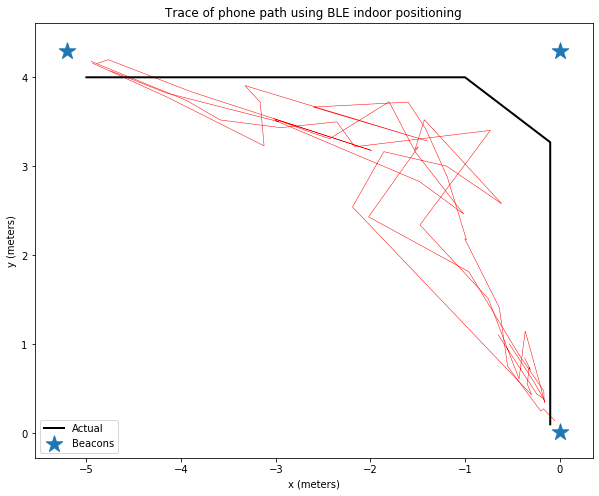

[[-0.53287494  1.00500636]
 [-1.49341125  3.21866796]
 [-1.80223747  3.72509042]
 [-3.89971967  3.83991266]]


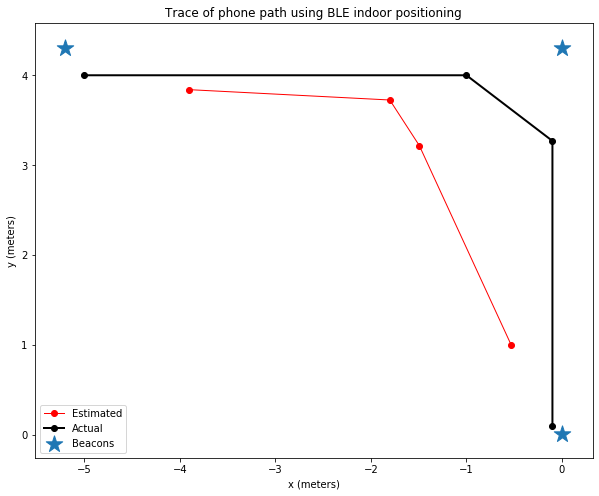

All MSE:  [1.00320348 1.39435645 0.84803316 1.11186544]
Average MSE:  1.0893646305918518


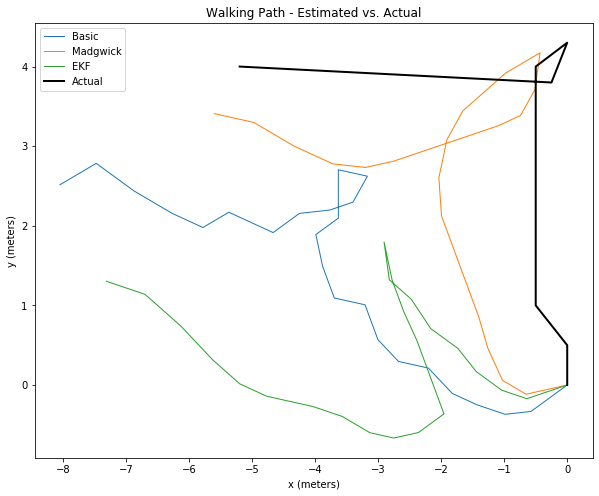

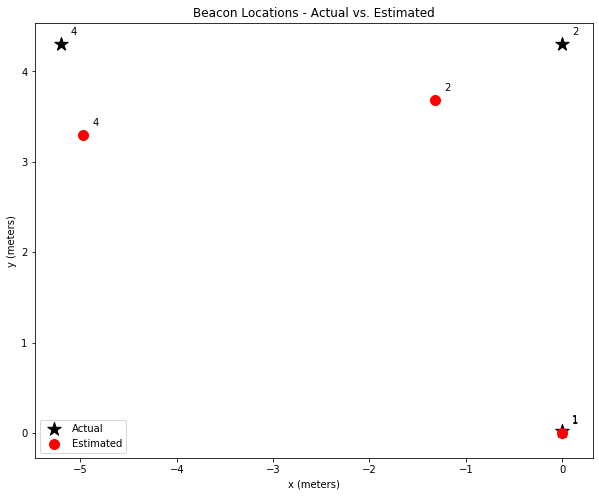

All MSE:  [0.018      1.45788133 1.02689112]
Average MSE:  0.8342574841116773
Basic  - All MSE:  [0.018      4.66159944 2.73561206]
Basic  - Average MSE:  2.4717371682777434
Madgwick  - All MSE:  [0.018      1.45788133 1.02689112]
Madgwick  - Average MSE:  0.8342574841116773
EKF  - All MSE:  [0.018      4.43576038 3.50014496]
EKF  - Average MSE:  2.651301779532059


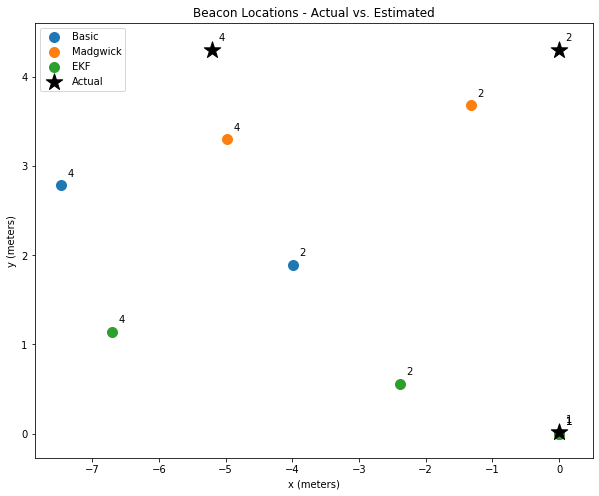

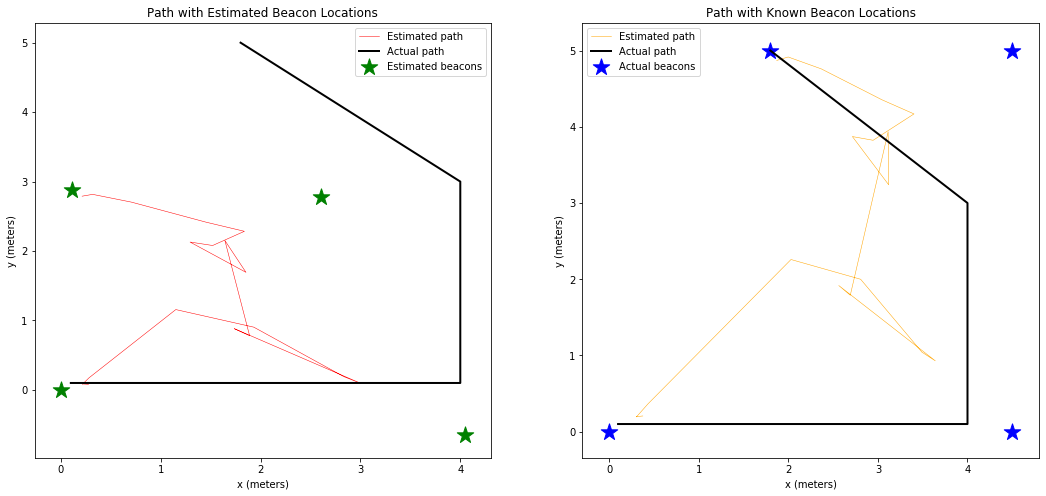

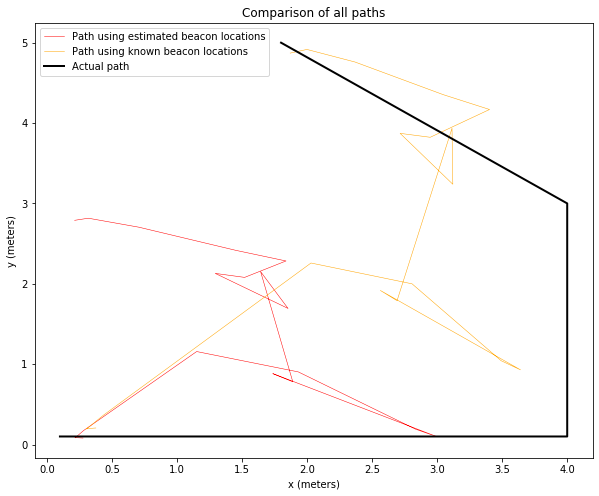

numpoints  20
everyOtherPt  2


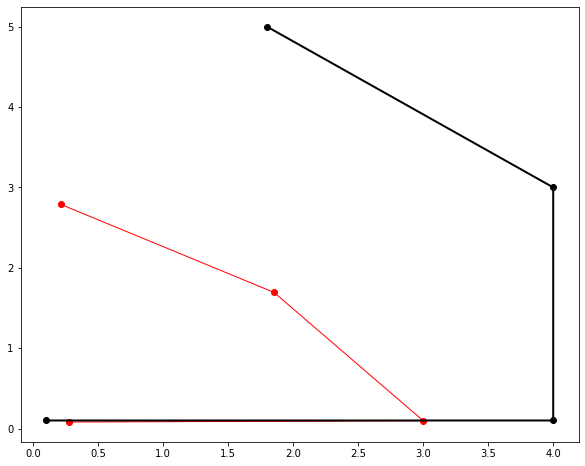

All MSE:  [0.17831792 3.78475397 4.77541764 5.16529828]
Average MSE:  3.475946953769457


In [15]:


# Showing results e
# ECE M202A Final Project - Max Gong - Fall 2020

#########################################################################################################


import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib
import time
import math
from scipy.optimize import minimize
from IPython.display import display, clear_output

matplotlib.rcParams['figure.figsize'] = (10,8)        # set figure size

############################################################################################################

# Trace of phone path using BLE indoor positioning
def compare_all(phoneMapNum, beaconLocationsNum):
    fileNameEstimated = 'phoneMap' + str(phoneMapNum) + '.txt'
    fileNameKnown = 'phoneMap' + str(phoneMapNum) + 'reference.txt'
    fileNameActual = 'phoneMap' + str(phoneMapNum) + 'Actual.txt'
    fileNameEstimatedBeacons = 'beaconLocations'+str(beaconLocationsNum)+'.txt'
    fileNameActualBeacons = 'beaconLocationsReference'+str(beaconLocationsNum)+'.txt'
    phonePathEstimated = np.loadtxt(fileNameEstimated)
    phonePathKnown = np.loadtxt(fileNameKnown)
    phonePathActual = np.loadtxt(fileNameActual)
    idsEstimated = np.loadtxt(fileNameEstimatedBeacons)[:,0]
    beaconsEstimated = np.loadtxt(fileNameEstimatedBeacons)[:,[1,2]]
    idsActual = np.loadtxt(fileNameActualBeacons)[:,0]
    beaconsActual = np.loadtxt(fileNameActualBeacons)[:,[1,2]]
    
    # Plot two separate plots
    rcParams['figure.figsize'] = 18,8
    fig, ax = plt.subplots(1,2)
    ax[0].plot(phonePathEstimated[:,0], phonePathEstimated[:,1],color='red',linewidth=0.5,label="Estimated path")
    ax[0].scatter(beaconsEstimated[:,0], beaconsEstimated[:,1],s=300,marker="*",color="green",label="Estimated beacons")
    ax[0].plot(phonePathActual[:,0], phonePathActual[:,1],color='black',linewidth=2,label="Actual path")
    ax[0].legend()
    ax[0].set(xlabel='x (meters)', ylabel='y (meters)', title='Path with Estimated Beacon Locations')
    ax[1].plot(phonePathKnown[:,0], phonePathKnown[:,1],color='orange',linewidth=0.5,label="Estimated path")
    ax[1].scatter(beaconsActual[:,0], beaconsActual[:,1],s=300,marker="*",color="blue",label="Actual beacons")
    ax[1].plot(phonePathActual[:,0], phonePathActual[:,1],color='black',linewidth=2,label="Actual path")
    ax[1].legend()
    ax[1].set(xlabel='x (meters)', ylabel='y (meters)', title='Path with Known Beacon Locations')
    plt.show()
    
    # Plot 1 plot to compare BOTH paths to actual
    rcParams['figure.figsize'] = (10,8)        # set figure size
    plt.plot(phonePathEstimated[:,0], phonePathEstimated[:,1],color='red',linewidth=0.5,label="Path using estimated beacon locations")
    plt.plot(phonePathKnown[:,0], phonePathKnown[:,1],color='orange',linewidth=0.5,label="Path using known beacon locations")
    plt.plot(phonePathActual[:,0], phonePathActual[:,1],color='black',linewidth=2,label="Actual path")
    plt.legend()
    plt.xlabel('x (meters)')
    plt.ylabel('y (meters)')
    plt.title('Comparison of all paths')
    plt.show()
    
    # Calculate all MSE
    numPoints = phonePathEstimated.shape[0]
    print('numpoints ', numPoints)
    divPt = 10
    everyOtherPt = np.maximum(int(np.round((numPoints-1)/divPt)), 1)
    print('everyOtherPt ', everyOtherPt)
    fourPointsEstimated = np.asarray([phonePathEstimated[0,:], phonePathEstimated[4*everyOtherPt,:], phonePathEstimated[6*everyOtherPt,:], phonePathEstimated[(divPt)*everyOtherPt-1,:]])
    plt.plot(fourPointsEstimated[:,0], fourPointsEstimated[:,1],color='red',linewidth=1,label="Estimated",marker="o")
    plt.plot(phonePathActual[:,0], phonePathActual[:,1],color='black',linewidth=2,label="Actual",marker="o")
    plt.show()
    mse = np.zeros(4)
    for i in np.arange(4):                                                                    # calculate MSE 
        mse[i] = np.sqrt(np.square(phonePathActual[i,0]-phonePathEstimated[i,0]) + np.square(phonePathActual[i,1]-phonePathEstimated[i,1]))
    mseAverage = np.average(mse)
    print("All MSE: ", mse)
    print("Average MSE: ", mseAverage)
    

# Trace of phone path using BLE indoor positioning
def results_IP_path(referenceNum):
    numOfPhoneMaps = 4
    for i in np.arange(numOfPhoneMaps):
        fileNamePhoneMap = 'phoneMap' + str(i+1) + '.txt'                    # plot paths
        phonePath = np.loadtxt(fileNamePhoneMap)
        plt.plot(phonePath[:,0], phonePath[:,1],color='red',linewidth=0.5)
    fileNamebeaconLocations = 'beaconLocationsReference'+str(referenceNum)+'.txt'             # plot beacons
    beaconLocations = np.loadtxt(fileNamebeaconLocations)
    plt.scatter(beaconLocations[:,1], beaconLocations[:,2],label="Beacons",s=300,marker="*")
    fileNameBLEPath = 'phoneMapReference'+str(referenceNum)+'.txt'
    referencePath = np.loadtxt(fileNameBLEPath)                             # plot actual path
    plt.plot(referencePath[:,0], referencePath[:,1],color='black',linewidth=2,label="Actual")
    plt.legend()
    plt.xlabel('x (meters)')
    plt.ylabel('y (meters)')
    plt.title('Trace of phone path using BLE indoor positioning')
    plt.show()
    
    # Identify corresponding 4 points on 1 of recorded paths to calculate MSE
    fileNamePhoneMap = 'phoneMap2.txt'
    phonePath = np.loadtxt(fileNamePhoneMap)
    numPoints = phonePath.shape[0]
    divPt = 16
    everyOtherPt = np.maximum(int(np.round((numPoints-1)/divPt)), 1)
    phonePath = np.asarray([phonePath[0,:], phonePath[9*everyOtherPt,:], phonePath[11*everyOtherPt,:], phonePath[(divPt)*everyOtherPt,:]])
    print(phonePath)
    plt.plot(phonePath[:,0], phonePath[:,1],color='red',linewidth=1,label="Estimated",marker="o")
    plt.scatter(beaconLocations[:,1], beaconLocations[:,2],label="Beacons",s=300,marker="*")
    plt.plot(referencePath[:,0], referencePath[:,1],color='black',linewidth=2,label="Actual",marker="o")
    plt.legend()
    plt.xlabel('x (meters)')
    plt.ylabel('y (meters)')
    plt.title('Trace of phone path using BLE indoor positioning')
    plt.show()
    mse = np.zeros(4)
    for i in np.arange(4):                                                                    # calculate MSE 
        mse[i] = np.sqrt(np.square(referencePath[i,0]-phonePath[i,0]) + np.square(referencePath[i,1]-phonePath[i,1]))
    mseAverage = np.average(mse)
    print("All MSE: ", mse)
    print("Average MSE: ", mseAverage)
    
    
# Trace of phone path using IMU, compare to ACTUAL walking path
def results_MB_path(referenceNum, dataNumber):
    fileNamepositions = 'positions'+str(dataNumber)
    fileNameActual = 'walkingPathReference'+str(referenceNum)+'.txt'
    actualPath = np.loadtxt(fileNameActual)
    names = ["Basic", "Madgwick", "EKF"]
    for i in np.arange(len(names)):
        fileName = fileNamepositions+names[i]+'.txt'
        path = np.loadtxt(fileName)
        plt.plot(path[:,0], path[:,1],linewidth=1,label=names[i])
    plt.plot(actualPath[:,0], actualPath[:,1],linewidth=2,label="Actual",color='black')
    plt.legend()
    plt.xlabel('x (meters)')
    plt.ylabel('y (meters)')
    plt.title('Walking Path - Estimated vs. Actual')
    plt.show()


# Compare IMU-identified beacon locations to ACTUAL beacon locations
def results_MB_beacons(referenceNum, dataNumber):
    fileNameActual = 'beaconLocationsReference'+str(referenceNum)+'.txt'       # load files
    actualBeaconLocations = (np.loadtxt(fileNameActual))[:,[1,2]]
    IDs = (np.loadtxt(fileNameActual))[:,0]
    fileNameEstimated = 'beaconLocations'+str(dataNumber)+'.txt'
    estimatedBeaconLocations = (np.loadtxt(fileNameEstimated))[:,[1,2]]
    estimatedIDs = (np.loadtxt(fileNameEstimated))[:,0]
    
    numBeacons = actualBeaconLocations.shape[0]
    plt.scatter(actualBeaconLocations[:,0], actualBeaconLocations[:,1],color='black',label="Actual",marker="*",s=200)    # plot actual vs. estimated beacon locations
    for i in np.arange(numBeacons):
        plt.annotate(str(int(IDs[i])), (actualBeaconLocations[i,0]+0.1, actualBeaconLocations[i,1]+0.1))   # annotate IDs
    plt.scatter(estimatedBeaconLocations[:,0], estimatedBeaconLocations[:,1],color='red',label="Estimated",s=100)
    for i in np.arange(numBeacons):
        plt.annotate(str(int(estimatedIDs[i])), (estimatedBeaconLocations[i,0]+0.1, estimatedBeaconLocations[i,1]+0.1))   # annotate IDs
    plt.legend()
    plt.xlabel('x (meters)')
    plt.ylabel('y (meters)')
    plt.title('Beacon Locations - Actual vs. Estimated')
    plt.show()

    mse = np.zeros(numBeacons)
    for i in np.arange(numBeacons):                                                                    # calculate MSE 
        mse[i] = np.sqrt(np.square(actualBeaconLocations[i,0]-estimatedBeaconLocations[i,0]) + np.square(actualBeaconLocations[i,1]-estimatedBeaconLocations[i,1]))
    mseAverage = np.average(mse)
    print("All MSE: ", mse)
    print("Average MSE: ", mseAverage)
    
    names = ["Basic", "Madgwick", "EKF"]               # Plot all of them
    for i in np.arange(len(names)):
        fileName = 'beaconLocations'+str(dataNumber)+names[i]+'.txt'
        tempIDs = (np.loadtxt(fileName))[:,0]
        tempLocations = (np.loadtxt(fileName))[:,[1,2]]
        plt.scatter(tempLocations[:,0],tempLocations[:,1],s=100,label=names[i])
        for j in np.arange(numBeacons):
            plt.annotate(str(int(tempIDs[j])), (tempLocations[j,0]+0.1, tempLocations[j,1]+0.1))           # annotate IDs
        mse = np.zeros(numBeacons)
        for k in np.arange(numBeacons):                                                                    # calculate MSE 
            mse[k] = np.sqrt(np.square(actualBeaconLocations[k,0]-tempLocations[k,0]) + np.square(actualBeaconLocations[k,1]-tempLocations[k,1]))
        mseAverage = np.average(mse)
        print(names[i], " - All MSE: ", mse)
        print(names[i], " - Average MSE: ", mseAverage)
    plt.scatter(actualBeaconLocations[:,0],actualBeaconLocations[:,1],color="black",s=300,label="Actual",marker="*")            # plot actual vs. estimated beacon locations
    for i in np.arange(numBeacons):
        plt.annotate(str(int(IDs[i])), (actualBeaconLocations[i,0]+0.1, actualBeaconLocations[i,1]+0.1))   # annotate IDs
    plt.legend()
    plt.xlabel('x (meters)')
    plt.ylabel('y (meters)')
    plt.title('Beacon Locations - Actual vs. Estimated')
    plt.show()
    
    
############################################################################################################

results_IP_path(referenceNum=4)
results_MB_path(referenceNum=4, dataNumber=4)
results_MB_beacons(referenceNum=4, dataNumber=4)
compare_all(phoneMapNum=8, beaconLocationsNum=11)